In [4]:
import mglearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
import warnings
warnings.simplefilter('ignore')

####  - 아래 문제는 다중공선성(Multicollinearity)의 문제를 고려치 않고 적합한 결과다. 따라서 잘못 적합된 가능성이 매우 높다. -

#### 1. total_grade.csv (q1,q2,mtot,ftot, finalscore)를 학습하여, q1:824, q2:910, mtot:2345612, ftot:1090인 경우 final score 를 예측하시오 . (linearRegress, SGDRegressor, MLPRegressor  r2 스코어를 구하시요.)

In [16]:
grade_df         = pd.read_csv( 'data4/total_grade.csv', header=None )
grade_df.columns = [ 'q1', 'q2', 'mtot', 'ftot','finalscore' ]
grade_df

,q1,q2,mtot,ftot,finalscore
0,0.0,1.0,2.0,3.0,4.0
1,828.0,920.0,1234567.0,1020.0,1111.0
2,824.0,910.0,2345612.0,1090.0,1234.0
3,880.0,900.0,3456123.0,1010.0,1000.0
4,870.0,990.0,2312123.0,1001.0,1122.0
5,860.0,980.0,3223123.0,1008.0,1133.0
6,850.0,970.0,2432123.0,1100.0,1221.0


In [17]:
x_data = grade_df.iloc[:, :-1]
x_data

,q1,q2,mtot,ftot
0,0.0,1.0,2.0,3.0
1,828.0,920.0,1234567.0,1020.0
2,824.0,910.0,2345612.0,1090.0
3,880.0,900.0,3456123.0,1010.0
4,870.0,990.0,2312123.0,1001.0
5,860.0,980.0,3223123.0,1008.0
6,850.0,970.0,2432123.0,1100.0


In [18]:
y_data = grade_df.iloc[:, -1]
y_data

0       4.0
1    1111.0
2    1234.0
3    1000.0
4    1122.0
5    1133.0
6    1221.0
Name: finalscore, dtype: float64

#### 1. 정규화(Normalization)

In [19]:
scaleX  = StandardScaler()
x_datas = scaleX.fit_transform( x_data )

In [20]:
# 데이터 수가 적어 여기서는 사용하지 않음.
# x_train, x_test, y_train, y_test = train_test_split( x_datas, y_data, test_size=0.2, random_state=1 )
# print(f'x_train shape: { x_train.shape } ')
# print(f'x_test shape:  { x_test.shape } ' )
# print(f'y_train shape: { x_train.shape } ')
# print(f'y_test shape:  { x_test.shape } ' )

#### 2. 상관관계를 통한 다중공선성(Multicollinearity)

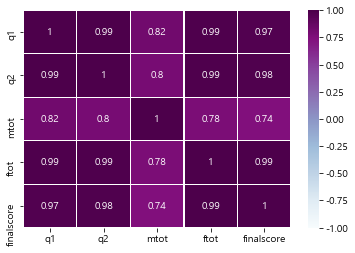

In [21]:
# 다중공선성이 존재할 것으로 보임.( 특성데이터(예측변수)간의 매우 높은 상관관계 )
sns.heatmap( grade_df.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.2, cmap='BuPu' ); plt.show()

- linearRegress

In [22]:
modelIR = LinearRegression()
modelIR.fit( x_datas, y_data )
modelIR.predict( scaleX.fit_transform( [[824, 910, 2345612, 1090]] ) )

array([975.])

In [23]:
print(f' R2 : { modelIR.score( x_datas, y_data )*100 }%' )

 R2 : 99.84479011526015%


- SGDRegressor

In [24]:
modelSGD = SGDRegressor( max_iter = 100, alpha=0.001, early_stopping=True, verbose=0 )
modelSGD.fit( x_datas, y_data )
modelSGD.predict(scaleX.fit_transform( [[824, 910, 2345612, 1090]] ) )

array([171.27972955])

In [25]:
print(f' R2 : { modelSGD.score( x_datas, y_data )*100 }%' )

 R2 : -330.76544476191873%


-  MLPRegressor

In [26]:
modelNN = MLPRegressor( max_iter=5000, alpha=0.1, verbose=0, hidden_layer_sizes=(100, 10, 3) )
modelNN.fit(  x_datas , y_data  )
modelNN.predict( scaleX.fit_transform( [[824, 910, 2345612, 1090]] ))

array([631.55673449])

In [27]:
print(f' R2 : { modelNN.score( x_datas, y_data )*100 }%' )

 R2 : 99.60886704023842%


#### 2. trees.csv를 읽어들여서 아래에 대해 linearRegress, SGDRegressor, MLPRegressor 각각의 train, test , r2 스코어를 구하고 아래의 Volume을 예측하시요. ( Girth 8.8, 10.5  Height 63, 72 )

In [14]:
tree_df = pd.read_csv( 'data4/trees.csv', header=0 )
tree_df.head(6)

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8
5,10.8,83,19.7


In [15]:
x_tree = tree_df.iloc[:, :-1]
x_tree.head(6)

,Girth,Height
0,8.3,70
1,8.6,65
2,8.8,63
3,10.5,72
4,10.7,81
5,10.8,83


In [16]:
y_tree = tree_df.iloc[:, -1]
y_tree.head(6)

0    10.3
1    10.3
2    10.2
3    16.4
4    18.8
5    19.7
Name: Volume, dtype: float64

#### 1. 정규화(Normalization)

In [17]:
scaleX = StandardScaler()
x_trees= scaleX.fit_transform( x_tree )

In [18]:
x_trains, x_tests, y_trains, y_tests = train_test_split( x_trees, y_tree, test_size=0.2, random_state=1 )
print(f'x_train shape: { x_trains.shape } ')
print(f'x_test shape:  { x_tests.shape } ' )
print(f'y_train shape: { x_trains.shape } ')
print(f'y_test shape:  { x_tests.shape } ' )

x_train shape: (24, 2) 
x_test shape:  (7, 2) 
y_train shape: (24, 2) 
y_test shape:  (7, 2) 


#### 2. 상관관계를 통한 다중공선성(Multicollinearity)

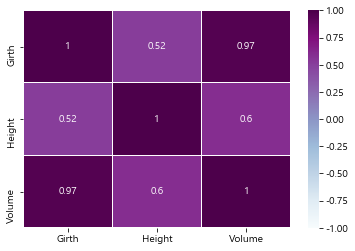

In [19]:
# Girth와 Volume 간의 높은 상관관계가 관찰됨. ( 다중공선성 의심. )
sns.heatmap( tree_df.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.3, cmap='BuPu' ); plt.show()

- linearRegress

In [20]:
modelIR = LinearRegression()
modelIR.fit( x_trains, y_trains )
modelIR.predict( scaleX.transform( [[8.8,63],[10.5,72]]) )

array([ 5.84983575, 16.27579072])

In [21]:
print(f' Train data R2 : { modelIR.score( x_trains , y_trains )*100 }%' )
print(f' Test data R2 : { modelIR.score(  x_tests , y_tests )*100 }%' )

 Train data R2 : 95.01000553451436%
 Test data R2 : 91.61318541491205%


- SGDRegressor

In [22]:
modelSGD = SGDRegressor( max_iter = 100, alpha=0.001, early_stopping=True, verbose=0 )
modelSGD.fit( x_trains, y_trains  )
modelSGD.predict( scaleX.transform( [[8.8,63],[10.5,72]]) )

array([ 3.41387517, 15.35774226])

In [23]:
print(f' Train data R2 : { modelSGD.score( x_trains , y_trains )*100 }%' )
print(f' Test data R2 : { modelSGD.score(  x_tests , y_tests )*100 }%' )

 Train data R2 : 90.1647459595208%
 Test data R2 : 81.63724912370704%


-  MLPRegressor

In [24]:
modelNN = MLPRegressor( max_iter=5000, alpha=0.1, verbose=0, hidden_layer_sizes=(100, 10, 3) )
modelNN.fit(  x_trains , y_trains  )
modelNN.predict( scaleX.transform( [[8.8,63],[10.5,72]]) )

array([4.11662609, 4.11662609])

In [25]:
print(f' Train data R2 : { modelNN.score( x_trains , y_trains )*100 }%' )
print(f' Test data R2 : { modelNN.score(  x_tests , y_tests )*100 }%' )

 Train data R2 : -213.4257103872668%
 Test data R2 : -632.2307493278095%


#### 3. volume이 40 이상이면 크다. 30이상이면 보통 미만이면 적음으로 아래와 같이 출력하시오.


    volume  정도
    ============
    10.3    적음
    ...


In [26]:
print( 'Volume', '정도', sep='\t' )
print( '='*12 )
for x, y in zip( tree_df['Volume'],  tree_df['Volume'].apply(lambda x : '많음' if x >= 40 else  '보통' if x>=30 else '적음') ):
    print( x, y, sep='\t' )

Volume	정도
10.3	적음
10.3	적음
10.2	적음
16.4	적음
18.8	적음
19.7	적음
15.6	적음
18.2	적음
22.6	적음
19.9	적음
24.2	적음
21.0	적음
21.4	적음
21.3	적음
19.1	적음
22.2	적음
33.8	보통
27.4	적음
25.7	적음
24.9	적음
34.5	보통
31.7	보통
36.3	보통
38.3	보통
42.6	많음
55.4	많음
55.7	많음
58.3	많음
51.5	많음
51.0	많음
77.0	많음


#### 4. Height가 가장 작은 값과 큰 값을 구하시오.

In [27]:
print('최대값:',  tree_df['Height'].max() )
print('최소값:',  tree_df['Height'].min() )

최대값: 87
최소값: 63


#### 5. girth(테두리)가 가장큰 top5를 출력하시오. 

In [28]:
# tree_df.sort_values('Girth',ascending=False).head()
# tree_df[['Girth']].nlargest(5, 'Girth',  keep='all') (dataFrame)
tree_df['Girth'].nlargest(5,  keep='all') 

30    20.6
28    18.0
29    18.0
27    17.9
26    17.5
Name: Girth, dtype: float64